## Install all Dependencies
First, install all necessary dependencies using the %pip command.

In [1]:
%pip install pandas matplotlib seaborn scikit-learn numpy
%pip install xgboost lightgbm tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Preprocessing
Load the  dataset and preprocess it.

In [1]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv('H:/Naan Mudalvan/merged_air_quality_data.csv')

In [2]:
# Check for missing values
print(df.isnull().sum())

location_id      0
location_name    0
parameter        0
value            0
unit             0
datetimeUtc      0
datetimeLocal    0
latitude         0
longitude        0
dtype: int64


In [3]:
# Remove exact duplicates
df = df.drop_duplicates()

In [4]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply outlier removal to 'value' column
df = remove_outliers_iqr(df, 'value')

In [5]:
# Convert datetime columns
df['datetimeUtc'] = pd.to_datetime(df['datetimeUtc'])
df['datetimeLocal'] = pd.to_datetime(df['datetimeLocal'])

In [6]:
# Save cleaned data
df.to_csv('H:/Naan Mudalvan/cleaned_air_quality_data.csv', index=False)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load cleaned dataset
df = pd.read_csv('H:/Naan Mudalvan/cleaned_air_quality_data.csv')

# (Optional) Step 2: If needed, you can shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Define features (X) and target (y)
# Here, we predict 'value' based on other columns (example)
X = df.drop(columns=['value'])   # All columns except 'value'
y = df['value']                  # Target column

# Step 4: Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Combine X and y back for saving as CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Step 6: Save Train and Test data separately
train_data.to_csv('H:/Naan Mudalvan/train_air_quality_data.csv', index=False)
test_data.to_csv('H:/Naan Mudalvan/test_air_quality_data.csv', index=False)

print("Train and Test datasets created and saved!")
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")

Train and Test datasets created and saved!
Train shape: (27824, 9)
Test shape: (6956, 9)


## EDA
Analyse the data and visualise it using matplotlib.

C:\Users\asus\AppData\Local\Temp\ipykernel_18364\2072578371.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='parameter', y='value', estimator='mean', ci=None)


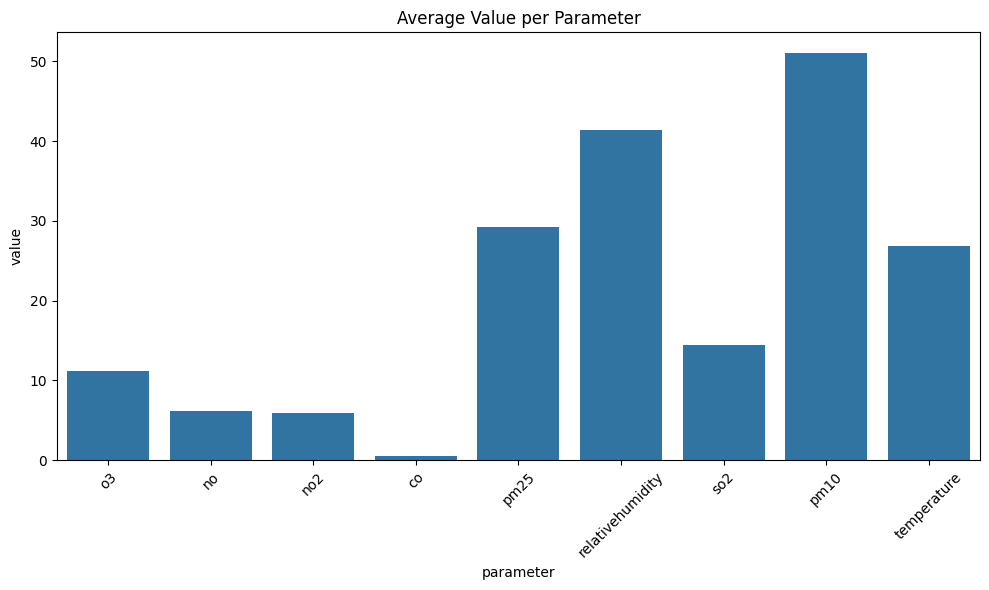

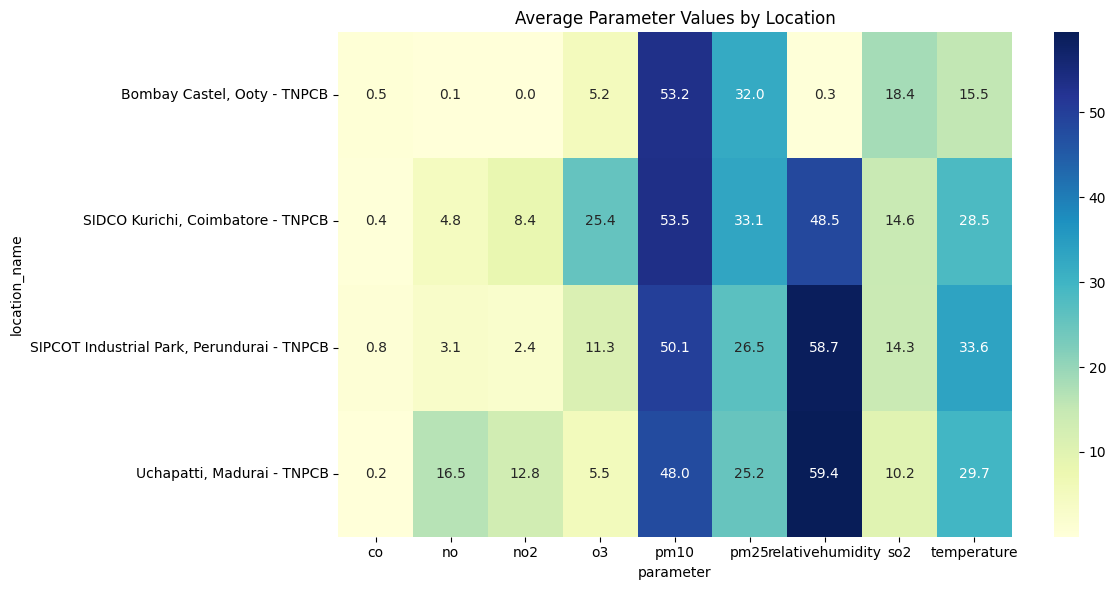

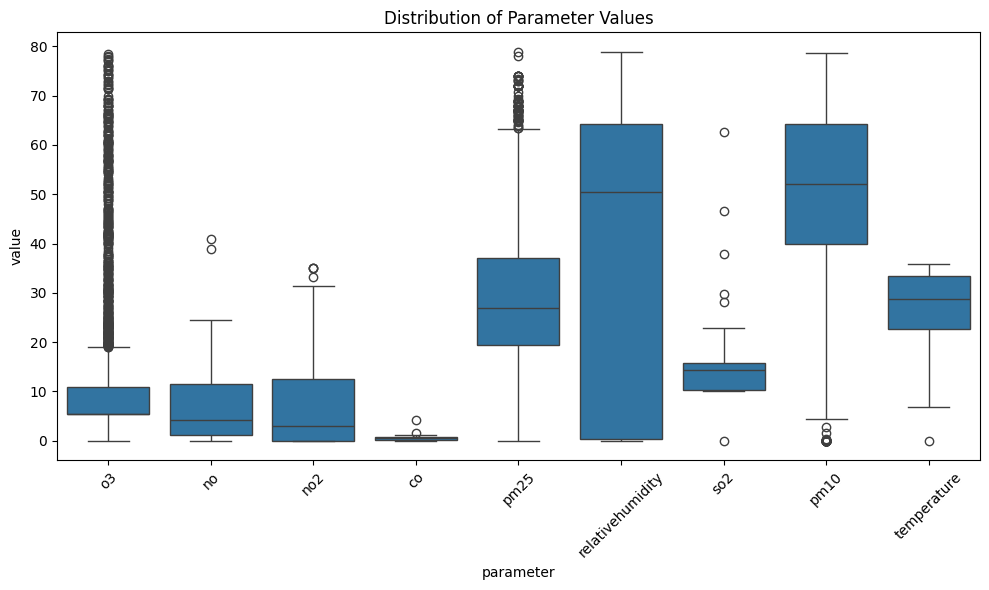

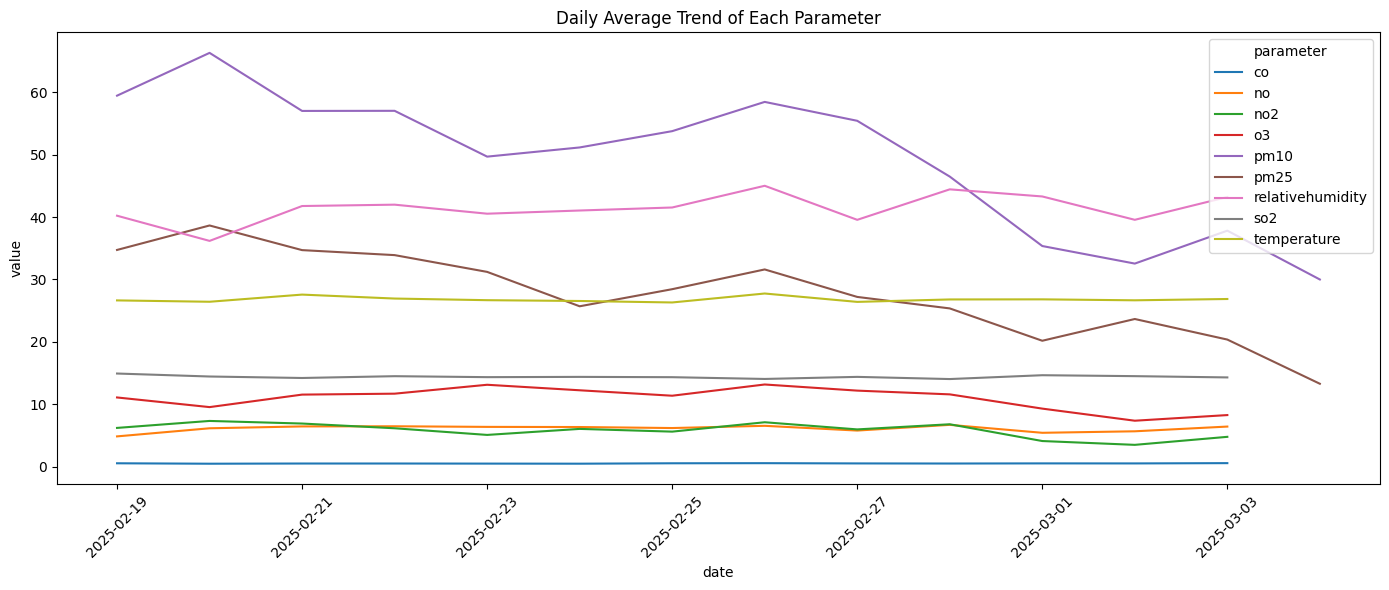

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('H:/Naan Mudalvan/train_air_quality_data.csv')
test = pd.read_csv('H:/Naan Mudalvan/test_air_quality_data.csv')

# Combine datasets for full visualization (optional)
data = pd.concat([train, test], ignore_index=True)

# Convert datetime columns
data['datetimeLocal'] = pd.to_datetime(data['datetimeLocal'])
data['datetimeUtc'] = pd.to_datetime(data['datetimeUtc'])

# 1. Plot average value per parameter
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='parameter', y='value', estimator='mean', ci=None)
plt.title('Average Value per Parameter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Heatmap of average value by location and parameter
pivot = data.pivot_table(values='value', index='location_name', columns='parameter', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Average Parameter Values by Location')
plt.tight_layout()
plt.show()

# 3. Box plot for distribution of values by parameter
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='parameter', y='value')
plt.title('Distribution of Parameter Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Time series plot of daily average values
data['date'] = data['datetimeLocal'].dt.date
daily_avg = data.groupby(['date', 'parameter'])['value'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_avg, x='date', y='value', hue='parameter')
plt.title('Daily Average Trend of Each Parameter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Dataset Overview
We check the structure, summary statistics, and missing values in the training set.

Training set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27824 entries, 0 to 27823
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    27824 non-null  int64  
 1   location_name  27824 non-null  object 
 2   parameter      27824 non-null  object 
 3   unit           27824 non-null  object 
 4   datetimeUtc    27824 non-null  object 
 5   datetimeLocal  27824 non-null  object 
 6   latitude       27824 non-null  float64
 7   longitude      27824 non-null  float64
 8   value          27824 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.9+ MB

Summary statistics:


,location_id,latitude,longitude,value
count,2.782400e+04,27824.000000,27824.000000,27824.000000
mean,1.823811e+06,10.868788,77.322454,20.060892
std,1.616051e+06,0.604451,0.507859,20.306302
min,8.914000e+03,9.865935,76.713897,0.000000
25%,3.584500e+05,9.865935,76.978996,3.260000
50%,3.409348e+06,11.258242,77.552761,14.180000
75%,3.409527e+06,11.258242,78.022669,32.020000
max,3.409527e+06,11.406829,78.022669,78.910000


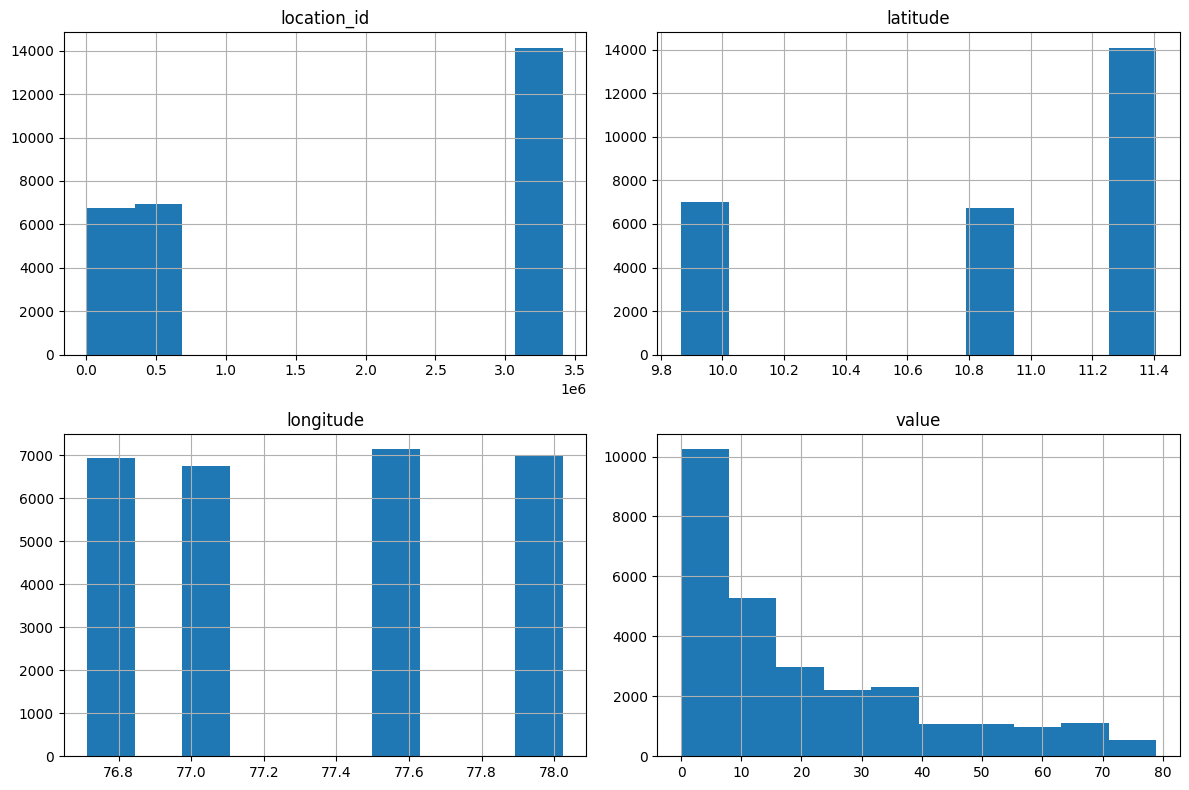

In [9]:
# Overview of the dataset
print("Training set info:")
train.info()

print("\nSummary statistics:")
display(train.describe())

# Visualize distributions of numerical features
train.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoder = LabelEncoder()

# List of columns you want to encode
categorical_cols = ['parameter', 'unit', 'location_name']

for col in categorical_cols:
    if col in X_train.columns:
        X_train[col] = encoder.fit_transform(X_train[col])
        X_test[col] = encoder.transform(X_test[col])


datatimeUtc and datetimelocal are not in the same format. We need to convert them to the same format and then extract the year, month, day, hour, dayofweek from datetimeu.

In [11]:
# Convert datetime columns to pandas datetime type
X_train['datetimeUtc'] = pd.to_datetime(X_train['datetimeUtc'])
X_test['datetimeUtc'] = pd.to_datetime(X_test['datetimeUtc'])

# Create new time-based features
for df in [X_train, X_test]:
    df['year'] = df['datetimeUtc'].dt.year
    df['month'] = df['datetimeUtc'].dt.month
    df['day'] = df['datetimeUtc'].dt.day
    df['hour'] = df['datetimeUtc'].dt.hour
    df['dayofweek'] = df['datetimeUtc'].dt.dayofweek

# Now you can safely drop the original datetime columns
X_train = X_train.drop(columns=['datetimeUtc', 'datetimeLocal'])
X_test = X_test.drop(columns=['datetimeUtc', 'datetimeLocal'])


## Model Training and Evaluation
Train the model using the preprocessed dataset inorder to predict the air quality index.

In [15]:
%pip install pmdarima
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import time
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



=== Training and Tuning XGBoost ===
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


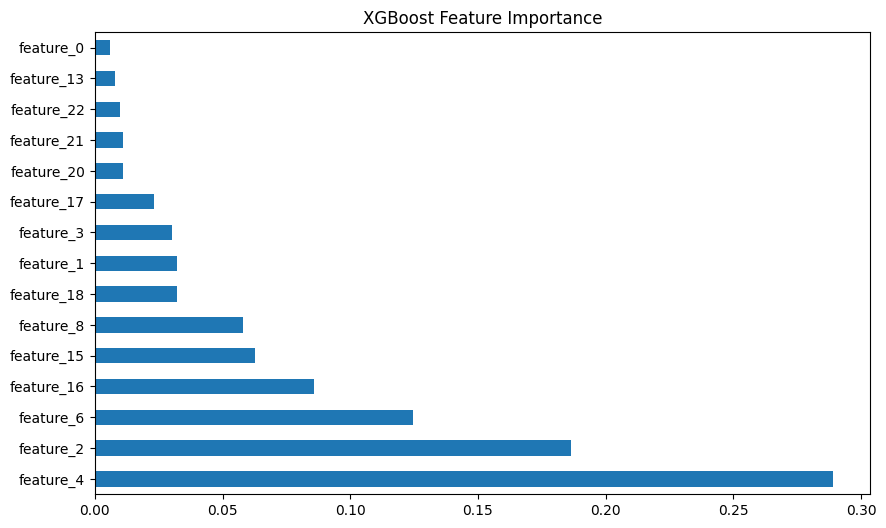

Test R2: 0.9348

=== Training and Tuning RandomForest ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


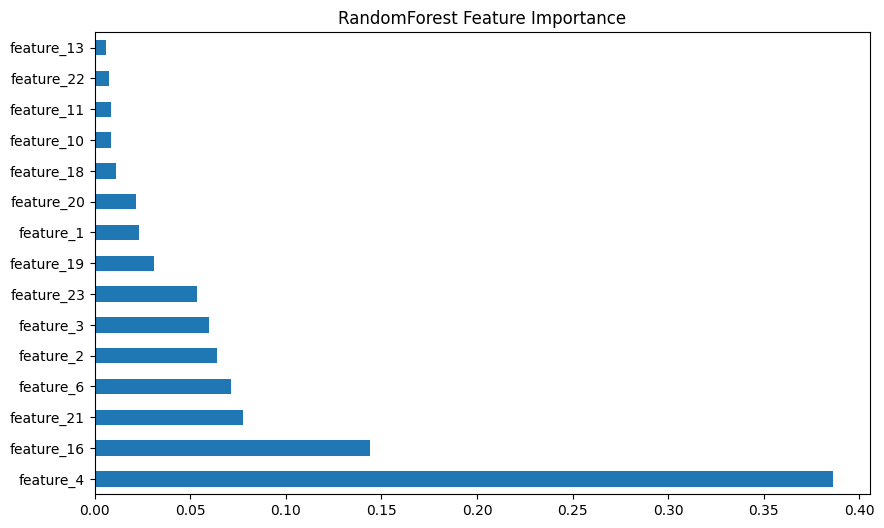

Test R2: 0.9430

=== Training and Tuning GradientBoosting ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


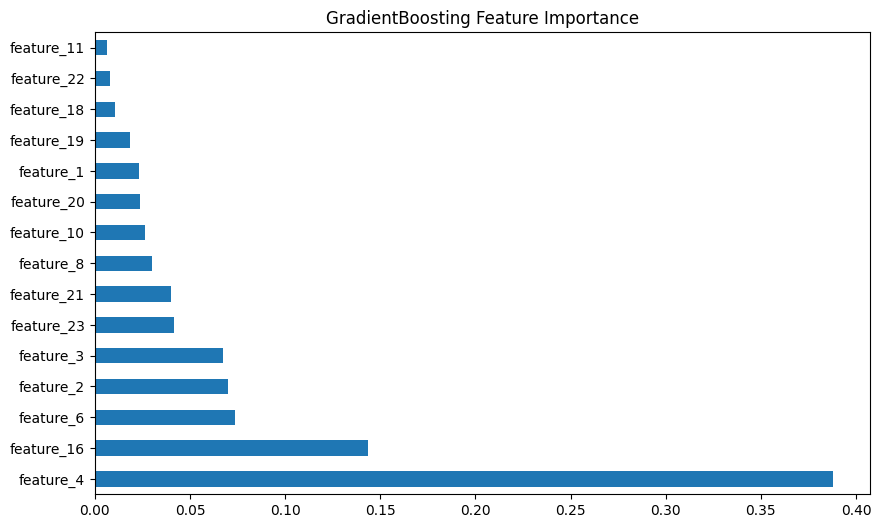

Test R2: 0.9353

=== Training and Tuning Ridge ===
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'alpha': 0.1, 'solver': 'auto'}
Test R2: 0.6605

=== Final Model Comparison ===
           Model  Train R2  Test R2  Train MAE  Test MAE  Train RMSE  Test RMSE  Training Time (s)
    RandomForest  0.948308 0.943040   2.051372  2.192577    4.616710   4.863800           4.006311
GradientBoosting  0.938746 0.935339   2.565830  2.608961    5.025614   5.182174           2.076684
         XGBoost  0.936215 0.934800   2.604978  2.622562    5.128420   5.203704           0.081000
           Ridge  0.669088 0.660465   7.956640  8.042766   11.680974  11.874974           0.006995


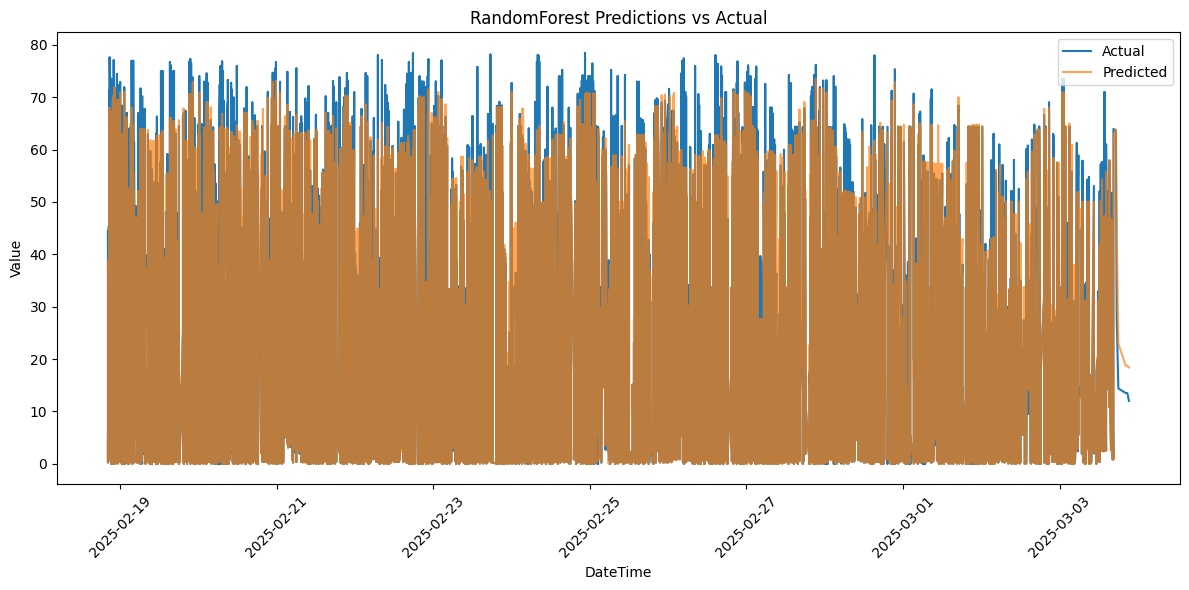


Results saved to 'time_series_model_results.csv'


In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import time

# Load datasets
train_df = pd.read_csv("H:/Naan Mudalvan/train_air_quality_data.csv", parse_dates=['datetimeUtc', 'datetimeLocal'])
test_df = pd.read_csv("H:/Naan Mudalvan/test_air_quality_data.csv", parse_dates=['datetimeUtc', 'datetimeLocal'])

# Sort by datetime
train_df = train_df.sort_values('datetimeUtc')
test_df = test_df.sort_values('datetimeUtc')

# Feature Engineering for Time Series
def create_time_features(df):
    df = df.copy()
    df['hour'] = df['datetimeUtc'].dt.hour
    df['day_of_week'] = df['datetimeUtc'].dt.dayofweek
    df['day_of_month'] = df['datetimeUtc'].dt.day
    df['month'] = df['datetimeUtc'].dt.month
    df['year'] = df['datetimeUtc'].dt.year
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    return df

train_df = create_time_features(train_df)
test_df = create_time_features(test_df)

# Encode categorical features
categorical_cols = ['location_id', 'location_name', 'parameter', 'unit']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure both datasets have same columns (align after one-hot encoding)
common_cols = list(set(train_df.columns) & set(test_df.columns))
train_df = train_df[common_cols + ['value']]
test_df = test_df[common_cols + ['value']]

# Separate features and target
X_train = train_df.drop(['value', 'datetimeUtc', 'datetimeLocal'], axis=1).values 
y_train = train_df['value'].iloc[:, 0].values  
X_test = test_df.drop(['value', 'datetimeUtc', 'datetimeLocal'], axis=1).values 
y_test = test_df['value'].iloc[:, 0].values  

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Time Series Cross Validation
tscv = TimeSeriesSplit(n_splits=5)

# Define evaluation function for time series
def evaluate_time_series_model(model, X_train, y_train, X_test, y_test, model_name, feature_names=None):
    start_time = time.time()

    # Fit model
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    metrics = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Training Time (s)': train_time
    }

    # Plot feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        if feature_names is None:
            feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
        feat_importances = pd.Series(model.feature_importances_, index=feature_names)
        feat_importances.nlargest(15).plot(kind='barh')
        plt.title(f'{model_name} Feature Importance')
        plt.show()

    return metrics

# Models with hyperparameter grids
models = {
    'XGBoost': {
        'model': xgb.XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10],
            'solver': ['auto', 'svd']
        }
    }
}

# Experimentation and evaluation
results = []

for name, config in models.items():
    print(f"\n=== Training and Tuning {name} ===")

    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=tscv,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

    model_metrics = evaluate_time_series_model(
        best_model, X_train_scaled, y_train, X_test_scaled, y_test, name
    )
    results.append(model_metrics)
    print(f"Test R2: {model_metrics['Test R2']:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test R2', ascending=False)

# Display final results
print("\n=== Final Model Comparison ===")
print(results_df.to_string(index=False))

# Get the best performing model
best_model_name = results_df.iloc[0]['Model']
best_params = None
for result in results:
    if result['Model'] == best_model_name:
        # Find the corresponding grid search
        if models[best_model_name]['params']:  # If model was tuned
            grid_search = GridSearchCV(
                estimator=models[best_model_name]['model'],
                param_grid=models[best_model_name]['params'],
                cv=tscv,
                scoring='r2',
                n_jobs=-1,
                verbose=0
            )
            grid_search.fit(X_train_scaled, y_train)
            best_params = grid_search.best_params_
        break

if best_params:
    best_model = models[best_model_name]['model'].set_params(**best_params)
else:
    best_model = models[best_model_name]['model']

best_model.fit(X_train_scaled, y_train)
y_test_pred = best_model.predict(X_test_scaled)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(test_df['datetimeUtc'], y_test, label='Actual')
plt.plot(test_df['datetimeUtc'], y_test_pred, label='Predicted', alpha=0.7)
plt.title(f'{best_model_name} Predictions vs Actual')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save results
results_df.to_csv('time_series_model_results.csv', index=False)
print("\nResults saved to 'time_series_model_results.csv'")

## Model extraction

In [21]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(9, 1)  

    def forward(self, x):
        return self.linear(x)

# Initialize model
model = MyModel()

# Save the model (entire model)
torch.save(model, 'model.pt')  # Saves model structure + weights

# OR Save only the state_dict (recommended way)
torch.save(model.state_dict(), 'model_state_dict.pt')
